In [66]:
import sys
import os
import numpy as np
import pandas as pd
from numpy.lib import recfunctions as rfn

import math
import tables
import pickle as pkl


import matplotlib as mpl
#Graphical options
import itertools
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
mpl.rc("savefig", dpi=300)

#from icecube import dataio, dataclasses, astro
import time
import random

sys.path.append("/data/user/liruohan/dataset/OscNext")
#import TimeConverter as TConverter
import os.path

In [67]:
#set parameters
#years=[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021] 
years=[11,12,13,14,15,16,17,18,19,20,21]

In [68]:
dtype_exp_data_ostnext=np.dtype([('angErr', '<f8'), ('logE', '<f8'), ('dec', '<f8'), ('ra', '<f8'),
                             ('run', '<i8'), ('event', '<i8'), ('subevent', '<i8'), 
                             ('time', '<f8'), ('azi', '<f8'), ('zen', '<f8')])

### NTS ###

In [58]:
#check NT format
NT_data_file_path = '/data/ana/analyses/northern_tracks/version-005-p02/IC86_2012_exp.npy'
NT_data_file = np.load(NT_data_file_path)

(array([1.7670e+04, 2.3923e+04, 1.6388e+04, 6.8370e+03, 2.6220e+03,
        7.9500e+02, 1.7600e+02, 2.9000e+01, 4.0000e+00, 2.0000e+00]),
 array([2.00002861, 2.38011584, 2.76020308, 3.14029031, 3.52037754,
        3.90046477, 4.28055201, 4.66063924, 5.04072647, 5.4208137 ,
        5.80090094]),
 <BarContainer object of 10 artists>)

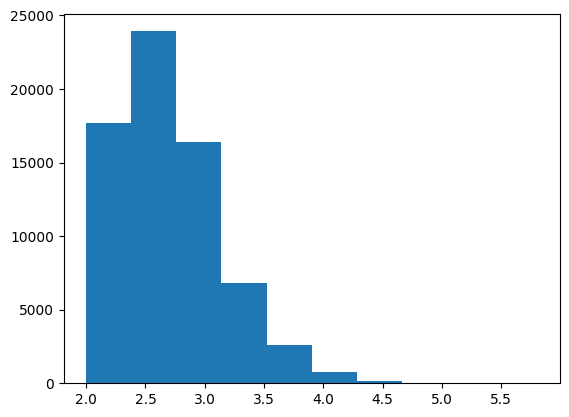

In [73]:
plt.hist(NT_data_file['logE'])

In [ ]:
len(NT_data_file['time'])

### new test field ###

In [94]:
new_data_file_path='pass2_Level7_v02.04_2014_.pkl'
new_data_file = np.load(new_data_file_path, allow_pickle=True)

In [95]:
new_data_file.keys()

dict_keys(['run', 'MJD_time', 'event', 'subevent', 'Accumulated_time', 'reco_TotalEnergy', 'angErr', 'logE', 'zen', 'azi', 'L4noise_classifier', 'L5nHit_DOMs', 'L7OscNext_bool', 'L7muon_classifier_all', 'L7muon_classifier_up', 'L7_ntop15', 'L7_nouter', 'L7reco_vertex_z', 'L7reco_vertex_rho36', 'L7reco_time'])

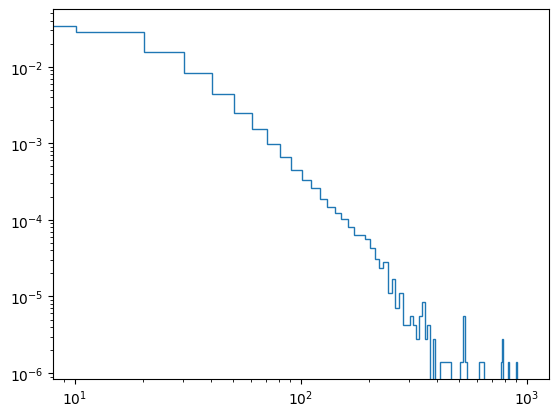

In [96]:
plt.hist(10**new_data_file['logE'],histtype='step',bins=np.linspace(0,1000,100),density=True)
#plt.hist(new_data_file['reco_TotalEnergy'],histtype='step',bins=np.linspace(0,1000,100))
plt.xscale('log')
plt.yscale('log')

In [6]:
len(new_data_file['event']),new_data_file.keys()

(43727,
 dict_keys(['run', 'MJD_time', 'event', 'subevent', 'Accumulated_time', 'reco_TotalEnergy', 'angErr', 'logE', 'zen', 'azi', 'dec', 'ra', 'reco_psi', 'L4noise_classifier', 'L5nHit_DOMs', 'L7OscNext_bool', 'L7muon_classifier_all', 'L7muon_classifier_up', 'L7_ntop15', 'L7_nouter', 'L7reco_vertex_z', 'L7reco_vertex_rho36', 'L7reco_time']))

In [48]:
new_data_file['logE'],new_data_file['reco_TotalEnergy']

(array([1.4160775 , 0.89489624, 1.39753775, ..., 1.08203304, 0.62603037,
        2.01880015]),
 array([ 26.0661869 ,   7.85048056,  24.9768548 , ...,  12.07905722,
          4.2269817 , 104.42395782]))

In [49]:
len(new_data_file['logE']),np.sum(new_data_file['logE']>0)

(43727, 43690)

In [8]:
np.sum(new_data_file['L7OscNext_bool']),len(new_data_file['L7OscNext_bool'])

(43673.0, 43727)

In [9]:
np.sum(new_data_file['L4noise_classifier'] > 0.95),len(new_data_file['L4noise_classifier'] > 0.95)

(51317, 53358)

In [11]:
accum_time=0
for yr in years:
    pkl_file_path = 'pass2_Level7_v02.00_20{}.pkl'.format(str(yr))
    oscnext_pkl=pd.read_pickle(pkl_file_path)
    accum_time+=np.sum(oscnext_pkl['Accumulated_time'])
    print(yr,accum_time)
print(accum_time/86400)

11 26098869.89238267
12 65862417.900567785
13 107143245.1320875
14 149644168.46794027
15 193439158.4380176
16 236786349.5955113
17 285298635.97411907
18 328412499.53802866
19 375211903.87134886
20 429670480.7035324
21 465480006.32674456
5387.500073226211


### old test field ###

In [ ]:
old_data_file_path = '/data/user/tchau/DarkMatter_OscNext/Sample/Data/data_IC86.12_level7_v02.00_pass2_test.pkl'
#old_data_file_path = '/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/Data/OscNext_Level7_v02.00_Data_2012_pass2_variables_NoCut.pkl'
old_data_file = np.load(old_data_file_path, allow_pickle=True)

In [ ]:
old_data_file.keys()

In [ ]:
old_data_file['reco_TotalEnergy']

In [ ]:
np.sum(old_data_file['L7_ntop15'] > 2.5),len(old_data_file['L7_ntop15'] > 2.5)

### loop ###

In [69]:
test_arr=np.asarray([1,2,3,4,5,6,7,8,9])
test_mask_1=(test_arr>6)
test_arr[test_mask_1] #True remain

array([7, 8, 9])

In [70]:
applied_cut = {"L7_nouter": 7.5,
               "L7muon_classifier_up": 0.4,
               "L7muon_classifier_all": 0.4,
               "L4muon_classifier_all": 0.4,
               "L4noise_classifier": 0.95,
               "L7reco_vertex_z": [-500.,-200.],
               "L7reco_vertex_rho36": 300.,
               "L7_ntop15": 2.5,
               "L7reco_time": 14500.,
               "L5nHit_DOMs": 2.5,
               "reco_Zenith":0.3,
             }
cut_direction = {"L7_nouter": "above",
                 "L7muon_classifier_up": "below",
                 "L7muon_classifier_all": "below",
                 "L4muon_classifier_all": "below",
                 "L4noise_classifier": "below",
                 "L7reco_vertex_z": [-500.,-200.],
                 "L7reco_vertex_rho36": "above",
                 "L7_ntop15": "below",
                 "L7reco_time": "above",
                 "L5nHit_DOMs": "below",
                 "reco_Zenith": None,
                }
# loc = np.where((data_file[year]["L7muon_classifier_up"]>0.4) &
#                (data_file[year]["L4noise_classifier"]>0.95) &
#                (data_file[year]["L7reco_vertex_z"]>-500.) &
#                (data_file[year]["L7reco_vertex_z"]<-200.) &
#                (data_file[year]["L7reco_vertex_rho36"]<300.) &
#                (data_file[year]["L5nHit_DOMs"]>2.5) &
#                (data_file[year]["L7_ntop15"]<2.5) &
#                (data_file[year]["L7_nouter"]<7.5) &
#                (data_file[year]["L7reco_time"]<14500.))

In [71]:
dtype_exp_data_ostnext=np.dtype([('angErr', '<f8'), ('logE', '<f8'), ('dec', '<f8'), ('ra', '<f8'),
                             ('run', '<i8'), ('event', '<i8'), ('subevent', '<i8'), 
                             ('time', '<f8'), ('azi', '<f8'), ('zen', '<f8')])

In [72]:
#start loop
for yr in years:
    #directory = '/data/user/tchau/DarkMatter_OscNext/Sample/Data/'
    pkl_file_path = 'pass2_Level7_v02.00_20{}.pkl'.format(str(yr))
    oscnext_pkl=pd.read_pickle(pkl_file_path)
    oscnext_pkl_file= oscnext_pkl


    #apply cut
    #L4
    noise_l4_mask = oscnext_pkl_file['L4noise_classifier'] > 0.95 #length inconsist problem
    #L5
    hitdom_l5_mask = oscnext_pkl_file['L5nHit_DOMs'] > 2.5
    #L7
    #muon_mask
    #muon_l7_mask1 = oscnext_pkl_file['L7muon_classifier_all'] > 0.4 #half_remain
    muon_l7_mask = oscnext_pkl_file['L7muon_classifier_up'] > 0.4 #half_remain
    #Coincident event cuts
    ntop_l7_mask = oscnext_pkl_file['L7_ntop15'] < 2.5 #too few
    nouter_l7_mask = oscnext_pkl_file['L7_nouter'] < 7.5
    #Containment cuts
    vertex_l7_mask1 = oscnext_pkl_file['L7reco_vertex_z']>-500
    vertex_l7_mask2 = oscnext_pkl_file['L7reco_vertex_z']<-200
    rho36_l7_mask = oscnext_pkl_file['L7reco_vertex_rho36'] < 300
    #reconstructed vertex inside detector
    recotime_l7_mask = oscnext_pkl_file['L7reco_time'] < 14500
    #energy mask
    energy_mask1 = ((oscnext_pkl_file['reco_TotalEnergy'])>5) #57000 remain
    energy_mask2 = ((oscnext_pkl_file['logE'])>0)
    combined_masks =  (energy_mask1 & energy_mask2 & muon_l7_mask & hitdom_l5_mask & ntop_l7_mask 
                      & vertex_l7_mask1 & vertex_l7_mask2 & nouter_l7_mask & rho36_l7_mask & recotime_l7_mask)

    #reco_zenith=oscnext_pkl_file['zen']
    #reco_azimuth=oscnext_pkl_file['azi']
    #time_mjd=oscnext_pkl_file['MJD_time']
    #Reco
    #reco_ra, reco_dec = astro.dir_to_equa(reco_zenith, reco_azimuth, time_mjd)
    #Scramble in RA
    #reco_ra = (2*math.pi)*np.random.rand(len(reco_dec))
    #reco_psi = astro.angular_distance(reco_ra, reco_dec, np.radians(266.4167), np.radians(-29.0078))
    
    # minimal amount of exp data: run, ra, dec, ang_err, time, log energy
    exp_data={}
    exp_data['angErr'] = oscnext_pkl_file['angErr'][combined_masks]
    exp_data['logE']= oscnext_pkl_file['logE'][combined_masks]
    exp_data['dec'] = oscnext_pkl_file['ra'][combined_masks] #ra dec invert because original files were wrong!
    exp_data['ra'] = oscnext_pkl_file['dec'][combined_masks]
    exp_data['run'] = oscnext_pkl_file['run'][combined_masks]
    exp_data['time'] = oscnext_pkl_file['MJD_time'][combined_masks]
    #trivial field
    #exp_data['event'] = np.zeros(np.shape(oscnext_pkl_file['event']))[combined_masks]
    exp_data['event'] = oscnext_pkl_file['event'][combined_masks]
    exp_data['subevent'] = oscnext_pkl_file['subevent'][combined_masks]
    exp_data['azi'] = oscnext_pkl_file['azi'][combined_masks]
    exp_data['zen'] = oscnext_pkl_file['zen'][combined_masks]
    #run only once for check livetime
#    exp_data['Accumulated_time']=oscnext_pkl_file['Accumulated_time'][combined_masks]

    temp_array=np.vstack((exp_data['angErr'],exp_data['logE'],exp_data['dec'],
                   exp_data['ra'], exp_data['run'],exp_data['event'],exp_data['subevent'],
                   exp_data['time'], exp_data['azi'],exp_data['zen']))
    temp_array_trans=np.transpose(temp_array)
    temp_array_final=rfn.unstructured_to_structured(temp_array_trans, dtype_exp_data_ostnext)
    
    save_filename='IC86_OscNext_{}_exp.npy'.format(str(yr))
    
    np.save(save_filename,temp_array_final)
    print(len(temp_array_final['logE']))
    print('done:',yr)

21551
done: 11
33093
done: 12
34057
done: 13
36218
done: 14
36490
done: 15
36034
done: 16
41076
done: 17
37071
done: 18
31324
done: 19
36684
done: 20
24141
done: 21


In [35]:
accum_time=0
for yr in years:
    pkl_file_path = 'IC86_OscNext_{}_exp.npy'.format(str(yr))
    oscnext_pkl=np.load(pkl_file_path)
    accum_time+=np.sum(oscnext_pkl['Accumulated_time'])
    print(yr,accum_time)
print(accum_time/86400/365)

11 12459771.22772485
12 31467724.70140646
13 51114544.89482185
14 72019918.87775832
15 93128048.15094051
16 113957107.95304519
17 137617748.7565015
18 158884294.35857
19 176855546.6678173
20 197970924.50108358
21 211788988.402987
6.715784766710648


In [79]:
test_data_file_path='IC86_OscNext_11_exp.npy'
test_data_file = np.load(test_data_file_path)

In [82]:
test_data_file

array([(0.2927849 , 1.51399491, -0.57333188, 5.11582239, 122282,  3997265, 0, 56414.48562384, 0.74007732, 0.99757409),
       (0.0332356 , 1.75119839, -0.67269284, 4.89591508, 122282, 13164839, 0, 56414.5252744 , 2.62823629, 0.8993305 ),
       (0.15576315, 0.83394049,  0.62027272, 3.10666037, 122282, 13958439, 0, 56414.52870516, 2.73147893, 2.19217801),
       ...,
       (0.06033073, 1.91499425, -0.34644479, 2.94508745, 124701,  6411718, 0, 56783.51678332, 5.78861952, 1.22300839),
       (0.35640145, 1.05405351, -0.85313883, 5.19632737, 124701, 11136932, 0, 56783.53727388, 1.33920658, 0.71800888),
       (0.30424444, 1.0048146 , -0.66453235, 2.23359651, 124701, 13915077, 0, 56783.54932077, 1.21513534, 0.90634376)],
      dtype=[('angErr', '<f8'), ('logE', '<f8'), ('dec', '<f8'), ('ra', '<f8'), ('run', '<i8'), ('event', '<i8'), ('subevent', '<i8'), ('time', '<f8'), ('azi', '<f8'), ('zen', '<f8')])

(array([3.1378e+04, 1.9830e+03, 4.5500e+02, 1.6100e+02, 4.8000e+01,
        1.5000e+01, 8.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  5.00043887,  58.95717751, 112.91391616, 166.8706548 ,
        220.82739345, 274.78413209, 328.74087074, 382.69760938,
        436.65434803, 490.61108667, 544.56782532]),
 <BarContainer object of 10 artists>)

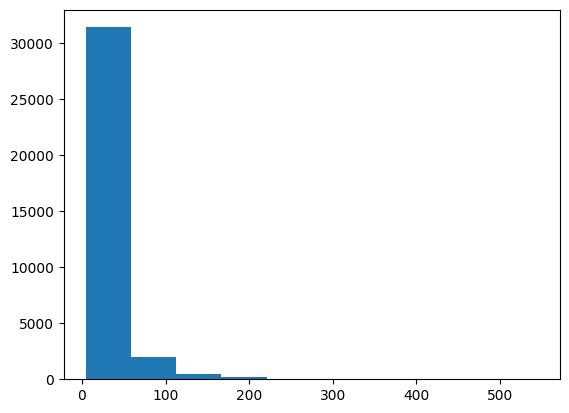

In [85]:
plt.hist(10**test_data_file['logE'],bins=())

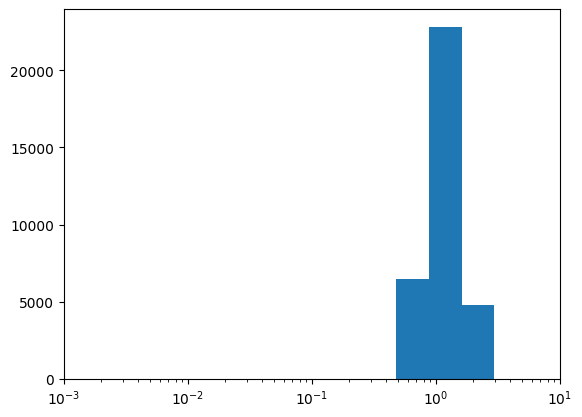

In [81]:
plt.hist(test_data_file['angErr'],bins=np.logspace(-4,1,20))
plt.xlim([1e-3,10])
plt.xscale('log')

In [ ]:
#start loop
for yr in years:
    directory = '/data/user/tchau/DarkMatter_OscNext/Sample/Data/'
    pkl_file_name = 'data_IC86.{}_level7_v02.00_pass2.pkl'.format(str(yr))
    pkl_file_path = directory + pkl_file_name
    angErr_path='pass2_Level7_v02.04_2012_angErr.pkl'.format(str(yr))
    angErr_file = np.load(angErr_path, allow_pickle=True)
    oscnext_pkl=pd.read_pickle(pkl_file_path)
    oscnext_pkl_file= oscnext_pkl

    

    #apply cut
    #L4
    noise_l4_mask = oscnext_pkl_file['L4noise_classifier'] > 0.95
    #L5
    hitdom_l5_mask = oscnext_pkl_file['L5nHit_DOMs'] > 2.5
    #L7
    #muon_mask
    #muon_l7_mask1 = oscnext_pkl_file['L7muon_classifier_all'] > 0.4 #half_remain
    muon_l7_mask = oscnext_pkl_file['L7muon_classifier_up'] > 0.4 #half_remain
    #Coincident event cuts
    ntop_l7_mask = oscnext_pkl_file['L7_ntop15'] < 2.5
    nouter_l7_mask = oscnext_pkl_file['L7_nouter'] < 7.5
    #Containment cuts
    vertex_l7_mask1 = oscnext_pkl_file['L7reco_vertex_z']>-500
    vertex_l7_mask2 = oscnext_pkl_file['L7reco_vertex_z']<-200
    rho36_l7_mask = oscnext_pkl_file['L7reco_vertex_rho36'] < 300	
    #reconstructed vertex inside detector
    recotime_l7_mask = oscnext_pkl_file['L7reco_time'] < 14500
    #energy mask
    energy_mask1 = ((oscnext_pkl_file['reco_TotalEnergy'])>5) #57000 remain
    #energy_mask2 = ((oscnext_pkl_file['reco_TotalEnergy'])<300)
    combined_masks = (energy_mask1 & muon_l7_mask & hitdom_l5_mask & noise_l4_mask & ntop_l7_mask 
                      & vertex_l7_mask1 & vertex_l7_mask2 & nouter_l7_mask & rho36_l7_mask & recotime_l7_mask)
    
    #angErr_file['angErr'] = np.concatenate((angErr_file['angErr'],([1e-2,1e-2,1e-2])))
    
    # minimal amount of exp data: run, ra, dec, ang_err, time, log energy
    exp_data={}
    exp_data['angErr'] = angErr_file['angErr'][:len(oscnext_pkl_file['RunID'])][combined_masks]
    exp_data['logE']= np.log10(oscnext_pkl_file['reco_TotalEnergy'])[combined_masks]
    exp_data['dec'] = oscnext_pkl_file['reco_Dec'][combined_masks]
    exp_data['ra'] = oscnext_pkl_file['reco_RA'][combined_masks]
    exp_data['run'] = oscnext_pkl_file['RunID'][combined_masks]
    exp_data['time'] = oscnext_pkl_file['StartTime'][combined_masks]
    #trivial field
    exp_data['event'] = np.zeros(np.shape(oscnext_pkl_file['RunID']))[combined_masks]
    exp_data['subevent'] = np.zeros(np.shape(oscnext_pkl_file['RunID']))[combined_masks]
    exp_data['azi'] = np.zeros(np.shape(oscnext_pkl_file['RunID']))[combined_masks]
    exp_data['zen'] = np.zeros(np.shape(oscnext_pkl_file['RunID']))[combined_masks]

    temp_array=np.vstack((exp_data['angErr'],exp_data['logE'],exp_data['dec'],
                   exp_data['ra'], exp_data['run'],exp_data['event'],exp_data['subevent'],
                   exp_data['time'], exp_data['azi'],exp_data['zen']))
    temp_array_trans=np.transpose(temp_array)
    temp_array_final=rfn.unstructured_to_structured(temp_array_trans, dtype_exp_data_ostnext)

    save_filename='IC86_OscNext_{}_exp.npy'.format(str(yr))
    
    np.save(save_filename,temp_array_final)
    print('done:',yr)

### draft ###

In [ ]:
check_log10_file_path='/data/user/liruohan/dataset/OscNext/data/IC86_2012_exp_minimal.npy'
check_log10_file=np.load(check_log10_file_path)

In [ ]:
min(check_log10_file['logE'])

In [ ]:
energy_mask = (check_log10_file['logE'] > 0)

In [ ]:
len(check_log10_file['dec']),len(check_log10_file['dec'][energy_mask])

In [ ]:
#check NT format
NT_MC_file_path = '/data/ana/analyses/northern_tracks/version-005-p02/IC86_pass2_MC.npy'
NT_MC_file = np.load(NT_MC_file_path)

In [ ]:
NT_MC_file

In [ ]:
NT_MC_file['run']

In [ ]:
#check if distribution looks same, only for muon sim

In [ ]:
old_sim_file_path='/data/user/liruohan/dataset/OscNext/data/IC86_OscNext_nu_mu.npy'
old_sim = np.load(old_sim_file_path,'r')

In [ ]:
old_sim

In [ ]:
np.sum(old_sim['ow'])

In [ ]:
new_sim_path = '/data/user/liruohan/dataset/OscNext/data/IC86_pass2_MC_nu_mu.npy'
#'/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/SimulationFiles/Reprocessed/OscNext_Level7_v02.00_140000_pass2_variables_NoCut.pkl'
new_sim = np.load(new_sim_path,'r', allow_pickle=True)

In [ ]:
np.sum(new_sim['ow'])

In [ ]:
new_sim

In [ ]:
len(np.unique(new_sim['140000']['Event_ID'])),len(np.unique(new_sim['140000'][ 'NEvents']))

In [ ]:
min(new_sim['140000']['true_Energy']),max(new_sim['140000']['true_Energy']),min(old_sim['trueE']),max(old_sim['trueE'])

In [ ]:
dec_bins=[-1.57,1.57,100]
ra_bins=[0,6.3,100]
true_E_bins=np.logspace(1,5,50)
one_weight_bins=[2,6e10,100]
plt.hist(old_sim['trueE'],bins=true_E_bins,label='old',density=True,histtype='step')
plt.hist(new_sim['140000']['true_Energy'],true_E_bins,label='new',density=True,alpha=0.3)
plt.legend()
plt.xscale('log')
plt.xlim([1,1e5])

In [ ]:
dtype_MC_ostnext=np.dtype([('ow', '<f8'), ('trueE', '<f8'), ('prompt', '<f8'), ('astro', '<f8'),
                        ('zen', '<f8'), ('angErr', '<f8'), ('logE', '<f8'), ('dec', '<f8'),
                        ('trueDec', '<f8'), ('trueRa', '<f8'), ('trueAzi', '<f8'), ('trueZen', '<f8'),
                        ('ra', '<f8'), ('psi', '<f8'), ('run', '<i8'), ('event', '<i8'), ('subevent', '<i8'),
                        ('time', '<f8'), ('azi', '<f8'), ('conv', '<f8')])
pid_dict={'nu_e':'120000','nu_mu':'140000','nu_tau':'160000'}

In [ ]:
#start loop

for name, pid in pid_dict.items():    
    
    sim_file_folder='/data/user/niovine/projects/DarkMatter_OscNext/Samples/OscNext/L7/SimulationFiles/Reprocessed/'
    OSC_sim_path=sim_file_folder+'OscNext_Level7_v02.00_{}_pass2_variables_NoCut.pkl'.format(pid)
    OSC_sim = np.load(OSC_sim_path,'r', allow_pickle=True)

    #apply cut
    energy_mask = (np.log10(OSC_sim[pid]['reco_TotalEnergy'])>0)
    muon_l7_mask = OSC_sim[pid]['L7muon_classifier_all'] > 0.4
    hitdom_l5_mask = OSC_sim[pid]['L5nHit_DOMs'] > 2.5
    noise_l4_mask = OSC_sim[pid]['L4noise_classifier'] > 0.95
    ntop_l7_mask = OSC_sim[pid]['L7_ntop15'] < 2.5
    vertex_l7_mask1 = OSC_sim[pid]['L7reco_vertex_z']>-500
    vertex_l7_mask2 = OSC_sim[pid]['L7reco_vertex_z']<-200
    nouter_l7_mask = OSC_sim[pid]['L7_nouter'] < 7.5
    rho36_l7_mask = OSC_sim[pid]['L7reco_vertex_rho36'] < 300	
    recotime_l7_mask = OSC_sim[pid]['L7reco_time'] < 14500
    
    combined_masks = (energy_mask & muon_l7_mask & hitdom_l5_mask & noise_l4_mask & ntop_l7_mask
                      & vertex_l7_mask1 & vertex_l7_mask2 & nouter_l7_mask & rho36_l7_mask & recotime_l7_mask)

    
    # minimal amount of mc data: run, ra, dec, ang_err, time, log energy, true_ra, true_dec, true_energy, mcweight   
    df_oscnext={}
    print(pid)
    df_oscnext['ow']=OSC_sim[pid]['OneWeight'][combined_masks]
    df_oscnext['trueE']=np.log10(OSC_sim[pid]['true_Energy'])[combined_masks]
    df_oscnext['angErr']= abs(OSC_sim[pid]['true_psi']-OSC_sim[pid]['reco_psi'])[combined_masks]
    df_oscnext['logE']=np.log10(OSC_sim[pid]['reco_TotalEnergy'])[combined_masks]
    df_oscnext['dec']=OSC_sim[pid]['reco_Dec'][combined_masks]
    df_oscnext['trueDec']=OSC_sim[pid]['true_Dec'][combined_masks]
    df_oscnext['trueRa']=OSC_sim[pid]['true_RA'][combined_masks]
    df_oscnext['ra']=OSC_sim[pid]['reco_RA'][combined_masks]
    df_oscnext['run']=OSC_sim[pid]['Event_ID'][combined_masks]
    df_oscnext['time']=OSC_sim[pid]['MJD_time'][combined_masks]

    #trivial field
    df_oscnext['prompt']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]
    df_oscnext['astro']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]
    df_oscnext['zen']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]
    df_oscnext['trueAzi']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]
    df_oscnext['trueZen']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]
    df_oscnext['psi']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]
    df_oscnext['event']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]
    df_oscnext['subevent']=np.zeros(np.shape(OSC_sim[pid]['true_Energy'])) [combined_masks]
    df_oscnext['azi']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]
    df_oscnext['conv']=np.zeros(np.shape(OSC_sim[pid]['true_Energy']))[combined_masks]

    #file to save
    save_file_name = "/data/user/liruohan/dataset/OscNext/data/IC86_pass2_MC_{}.npy".format(name)
    temp_array=np.vstack((df_oscnext['ow'],df_oscnext['trueE'],df_oscnext['prompt'],df_oscnext['astro'],
                          df_oscnext['zen'], df_oscnext['angErr'],df_oscnext['logE'],df_oscnext['dec'],
                          df_oscnext['trueDec'], df_oscnext['trueRa'],df_oscnext['trueAzi'],df_oscnext['trueZen'],
                          df_oscnext['ra'], df_oscnext['psi'],df_oscnext['run'],df_oscnext['event'],
                          df_oscnext['subevent'],df_oscnext['time'],df_oscnext['azi'], df_oscnext['conv']))
    temp_array_trans=np.transpose(temp_array)
    temp_array_final=rfn.unstructured_to_structured(temp_array_trans, dtype_MC_ostnext)
    np.save(save_file_name,temp_array_final)
    print(name+'done')

In [ ]:
#how NTS sim looks like?

In [ ]:
NTS_sim_path='/data/ana/analyses/northern_tracks/version-005-p01/IC86_pass2_MC.npy'

In [ ]:
NTS_sim = np.load(NTS_sim_path,'r')
NTS_sim

In [ ]:
old_sim['angErr'],abs(new_sim['140000']['true_psi']-new_sim['140000']['reco_psi'])